Text(0, 0.5, 'y')

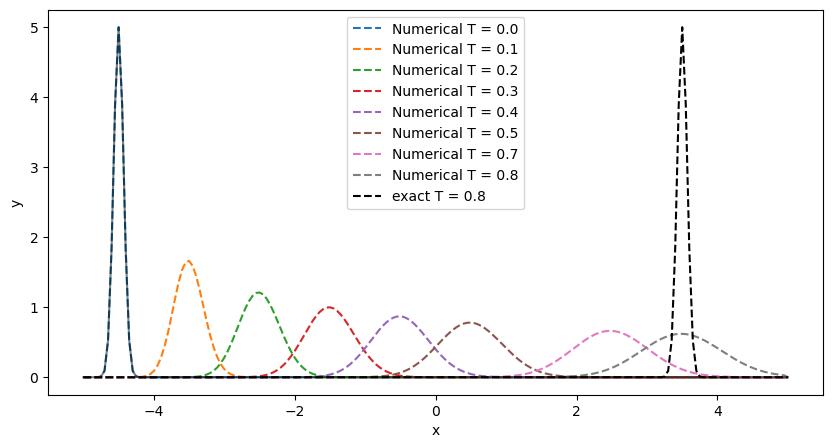

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(1,figsize=(10,5))

x_min, x_max = -5, 5
nx = 201
dx = (x_max-x_min) / (nx-1)

x0 = -4.5
sigma = 0.1
A = 5.0

x = np.linspace(x_min,x_max,nx)



TT = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.7,0.8])
dt = 0.001
v = 10.0

for T in TT:
    q = A*np.exp(- (x-x0)**2/sigma**2)
    q0 = q.copy()   
    nT = int(T/dt)

    def riemann_f(qL,qR,v):
        fL = qL*v 
        fR = qR*v 
        return 0.5 * ((fL+fR) - abs(v)*(qR-qL))

    for n in range(nT):
        qL = q[:-1]
        qR = q[1:]
        f_half = riemann_f(qL,qR,v)

        q_new = q.copy()
        for i in range(1,nx-1):
            q_new[i] = q[i] - (dt/dx)*(f_half[i] - f_half[i-1])

        q_new[0] = 0.0
        q = q_new

    # exact_q = A*np.exp(- (x-x0-v*T)**2/sigma**2)

 
    # plt.plot(x,exact_q,'k--', label='exact T = 0.5')
    plt.plot(x,q,'--',label=f'Numerical T = {T}')

T_final = TT[-1]


exact_q = A*np.exp(- (x-x0-v*T_final)**2/sigma**2)
plt.plot(x,q0,'k-',alpha=0.5)
plt.plot(x,exact_q,'k--', label=f'exact T = {T_final}')
plt.legend()

plt.xlabel('x')
plt.ylabel('y')



In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# x_min, x_max = -3,3
# nx = 201
# dx = (x_max-x_min) / (nx-1)
# x0 = -1.7

# x = np.linspace(x_min,x_max,nx)

# V = 1.5
# T = 1.0
# dt = 0.001
# nT = int(T/dt)

# A = 0.5
# sigma = 0.1
# q = A*np.exp(- (x-x0)**2/sigma**2)
# q0 = q.copy()

# def riemann_func(qL,qR,v):
#     fL = qL*v 
#     fR = qR*v
#     return 0.5 * ( (fL+fR) - abs(v)*(qR-qL) )

# for n in range(nT):
#     # print(n)
#     qL = q[:-1]
#     qR = q[1:]
#     f_half = riemann_func(qL,qR,V)
#     q_new = q.copy()
#     for i in range(1,nx-1):
#         q_new[i] = q[i] - (dt/dx)*(f_half[i]-f_half[i-1])
    
#     q_new[0] = 0.0
#     q = q_new

# exact_q = A*np.exp(- (x-x0-V*T)**2/sigma**2)

# plt.plot(x,q0)
# plt.plot(x,q_new)
# plt.plot(x,exact_q)

In [3]:
# x_min, x_max = -3,3
# nx = 301
# dx = (x_max-x_min) / (nx-1)
# x0 = -2.5

# TT = np.array([0.3,0.5,0.7,1.0,1.2])
# dt = 0.001

# sigma = 0.1

# def velocity(x):
#     return 1-x+x**2

# def riemann_flux(qL,qR,v_half):
#     fL = qL*v_half
#     fR = qR*v_half
#     return 0.5 * ( (fL+fR) - abs(v_half)*(qR-qL))

# x = np.linspace(x_min,x_max,nx)

# x_half = (x[:-1] + x[1:])*0.5
# v_half = velocity(x_half)


# A = 5
# q = A *np.exp(- (x-x0)**2/sigma**2)
# q0 = q.copy()

# for T in (TT):
#     nT = int(T/dt)
#     for n in range(nT):
#         qL = q[:-1]
#         qR = q[1:]

#         f_half = riemann_flux(qL,qR,v_half)
#         q_new = q.copy()
#         for i in range(1,nx-1):
#             q_new[i]= q[i] - (dt/dx)*(f_half[i]-f_half[i-1])
#         q_new[0] = 0.0
#         q = q_new 
#     # plt.plot(x,q0)
#     plt.plot(x,q_new,label=f'T = {T}')
# # exact_q = A *np.exp(- (x-x0-v_half*T)**2/sigma**2)
# plt.plot(x,q0,'k-')
# # plt.plot(x,q_new)
# plt.legend()

In [122]:
def riemann_function(qL,qR,v):
    fL = qL * v 
    fR = qR * v 
    return 0.5 * ((fL + fR)-abs(v)*(qR-qL))

def minmod(a,b):
    sign_a = np.sign(a) # -1 , 0 , 1 
    sign_b = np.sign(b) 
    return 0.5 * (sign_a +sign_b)*min(abs(a),abs(b))  # ab <= 0 -> s_i = 0 , ab>0, a>b => s_i = b , a < b => s_i = a 

def periodic_q(q,ng,nx):
    q[:ng] = q[nx+ng-1]
    q[nx+ng:] = q[ng]
    return q

L_1 =  0.005565573128461295


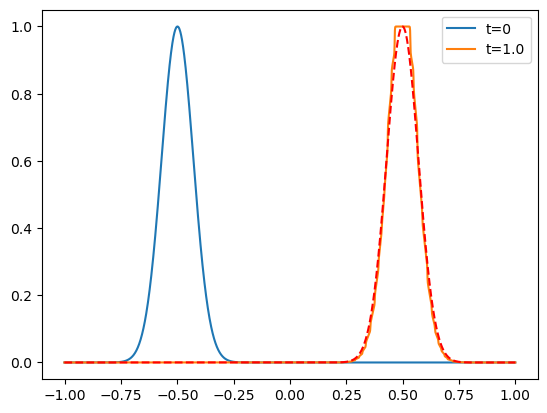

In [54]:
import numpy as np
import matplotlib.pyplot as plt


def riemann_function(qL,qR,v):
    fL = qL * v 
    fR = qR * v 
    return 0.5 * ((fL + fR)-abs(v)*(qR-qL))

def minmod(a,b):
    sign_a = np.sign(a) # -1 , 0 , 1 
    sign_b = np.sign(b) 
    return 0.5 * (sign_a +sign_b)*min(abs(a),abs(b))  # ab <= 0 -> s_i = 0 , ab>0, a>b => s_i = b , a < b => s_i = a 

def periodic(q,nx,ng):
    q[:ng] = q[nx:nx+ng] # Periodic
    q[-ng:] = q[ng:ng+ng] # Periodic
    # q[:ng] = q[ng] # ongoing
    # q[nx+ng:] = q[ng+nx-1] # ongoing

    return q


x_min, x_max, nx = -1,1,1600
dx = (x_max-x_min) / (nx)
x0 = -0.5
ng=2 
N = nx + 2*ng

qL = np.zeros(N)
qR = np.zeros(N)
f_half = np.zeros(N) 

x =  np.arange(x_min-ng*dx,x_max+ng*dx,dx)
# x = np.linspace(x_min-ng*dx,x_max+ng*dx,N)

v = 1.0
Time_set = 1.0
lam= 0.5
sig = 0.1
dt = lam*(dx/v)
A = 1.0

q = A * np.exp(-(x-x0)**2/sig**2)
q0 = q.copy()

Time = 0
counts=0

while Time < Time_set: 
    if Time + dt > Time_set :
        dt = Time_set - Time
    q = periodic(q,nx,ng)
    for i in range(1,N-1):
        sL = (q[i] - q[i-1]) /(x[i]-x[i-1]) 
        sR = (q[i+1] - q[i]) /(x[i+1]-x[i])
        s_i = minmod(sL,sR)
        qL[i] = q[i] - s_i*(x[i]-x[i-1])*0.5
        qR[i] = q[i] + s_i*(x[i+1]-x[i])*0.5
    
    q_new = q.copy()
    for i in range(ng,ng+nx+1):
        f_half[i] = riemann_function(qR[i-1], qL[i], v)
    for i in range(ng,ng+nx):
        q_new[i] = q[i] - (dt/dx) * (f_half[i+1] - f_half[i])
    
    q = q_new 
    Time += dt 
    
q_exact = A * np.exp(-(x-x0-v*Time_set)**2/sig**2)

plt.plot(x, q0, label="t=0")
plt.plot(x, q, label=f"t={Time_set}")
plt.plot(x,q_exact,'r--')
plt.legend()

L_1 = np.sum(abs(q_exact-q)) / N
print("L_1 = ",L_1)

L1 error = 0.00024932705903573483


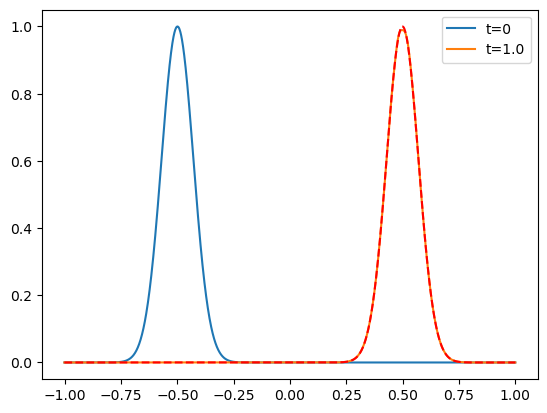

In [62]:
import numpy as np
import matplotlib.pyplot as plt


def riemann_function(qL,qR,v):
    fL = qL * v 
    fR = qR * v 
    return 0.5 * ((fL + fR)-abs(v)*(qR-qL))

def minmod(a,b):
    sign_a = np.sign(a) # -1 , 0 , 1 
    sign_b = np.sign(b) 
    return 0.5 * (sign_a +sign_b)*min(abs(a),abs(b))  # ab <= 0 -> s_i = 0 , ab>0, a>b => s_i = b , a < b => s_i = a 

def periodic(q,nx,ng):
    q[:ng] = q[nx:nx+ng] # Periodic
    q[nx+ng:] = q[ng:ng+ng] # Periodic
    # q[:ng] = q[ng] # ongoing
    # q[nx+ng:] = q[ng+nx-1] # ongoing

    return q


x_min, x_max, nx = -1,1,1600
dx = (x_max-x_min) / (nx)
x0 = -0.5
ng=2 
N = nx + 2*ng


x =  np.arange(x_min-ng*dx,x_max+ng*dx,dx)
# x = np.linspace(x_min-ng*dx,x_max+ng*dx,N)

v = 1.0
Time_set = 1.0
lam= 0.5
sig = 0.1
dt = lam*(dx/v)
A = 1.0

q = A * np.exp(-(x-x0)**2/sig**2)
q0 = q.copy()

Time = 0
counts=0


def RK_method(q,nx,ng,x,dx,v):

    qL = np.zeros(N)
    qR = np.zeros(N)
    f_half = np.zeros(N) 
    q = periodic(q,nx,ng)

    for i in range(1,N-1):
        sL = (q[i] - q[i-1]) /(x[i]-x[i-1]) 
        sR = (q[i+1] - q[i]) /(x[i+1]-x[i])
        s_i = minmod(sL,sR)
        qL[i] = q[i] - s_i*(x[i]-x[i-1])*0.5
        qR[i] = q[i] + s_i*(x[i+1]-x[i])*0.5
        
    for i in range(ng,ng+nx+1):
        f_half[i] = riemann_function(qR[i-1], qL[i], v)

    dqdt = np.zeros(len(q))
    for i in range(ng,ng+nx):
        dqdt[i] = -(f_half[i+1]-f_half[i])/ dx    
    return dqdt

t = 0.0

while t < Time_set:
    if t + dt > Time_set:
        dt = Time_set - t

    q_1 = q + dt*RK_method(q,nx,ng,x,dx,v)  # 2nd
    q_2 = q_1 + dt*RK_method(q_1,nx,ng,x,dx,v) # 2nd

    # q = 0.5*(q + q_2) # 2nd 

    q_3 = 0.25*(3*q + q_2)  # 3rd
    q_4 = q_3 + dt*RK_method(q_3,nx,ng,x,dx,v)  # 3rd
    q = (q+2*q_4) / 3   #3rd


    t += dt    

    
q_exact = A * np.exp(-(x-x0-v*Time_set)**2/sig**2)

plt.plot(x, q0, label="t=0")
plt.plot(x, q, label=f"t={Time_set}")
plt.plot(x,q_exact,'r--')
plt.legend()

L1 = np.sum(np.abs(q_exact - q)[ng:ng+nx]) / N   # L1 노름
print("L1 error =", L1)

L1 error = 0.0057769750322206135


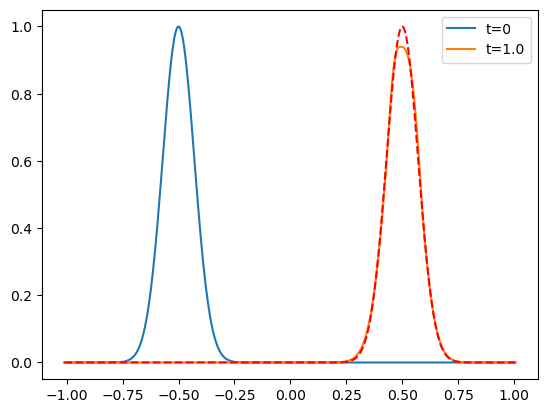

In [25]:
import numpy as np
import matplotlib.pyplot as plt


def riemann_function(qL,qR,v):
    fL = qL * v 
    fR = qR * v 
    return 0.5 * ((fL + fR)-abs(v)*(qR-qL))

def minmod(a,b):
    sign_a = np.sign(a) # -1 , 0 , 1 
    sign_b = np.sign(b) 
    return 0.5 * (sign_a +sign_b)*min(abs(a),abs(b))  # ab <= 0 -> s_i = 0 , ab>0, a>b => s_i = b , a < b => s_i = a 

def periodic(q,nx,ng):
    q[:ng] = q[nx:nx+ng] # Periodic
    q[nx+ng:] = q[ng:ng+ng] # Periodic
    # q[:ng] = q[ng] # ongoing
    # q[nx+ng:] = q[ng+nx-1] # ongoing

    return q

def rhs(q, nx, ng, x, dx, v):
    N = len(q)
    q = periodic(q, nx, ng)      # 고스트셀 채우기

    qL = np.zeros(N)
    qR = np.zeros(N)
    f_half = np.zeros(N)

    # 1. 기울기 + 인터페이스 상태
    for i in range(1, N-1):
        sL = (q[i]   - q[i-1]) / (x[i]   - x[i-1])
        sR = (q[i+1] - q[i])   / (x[i+1] - x[i])
        s_i = minmod(sL, sR)
        qL[i] = q[i] - 0.5 * s_i * (x[i]   - x[i-1])
        qR[i] = q[i] + 0.5 * s_i * (x[i+1] - x[i])

    # 2. 플럭스
    for i in range(ng, ng+nx+1):
        f_half[i] = riemann_function(qR[i-1], qL[i], v)

    # 3. - div F
    dqdt = np.zeros_like(q)
    for i in range(ng, ng+nx):
        dqdt[i] = -(f_half[i+1] - f_half[i]) / dx

    return dqdt

x_min, x_max, nx = -1,1,400
dx = (x_max-x_min) / (nx)
x0 = -0.5
ng=2 
N = nx + 2*ng

qL = np.zeros(N)
qR = np.zeros(N)
f_half = np.zeros(N) 

x =  np.arange(x_min-ng*dx,x_max+ng*dx,dx)
# x = np.linspace(x_min-ng*dx,x_max+ng*dx,N)

v = 1.0
Time_set = 1.0
lam= 0.5
sig = 0.1
dt = lam*(dx/v)
A = 1.0

q = A * np.exp(-(x-x0)**2/sig**2)
q0 = q.copy()

Time = 0
counts=0

Time = 0
t = 0.0

while t < Time_set:
    if t + dt > Time_set:
        dt = Time_set - t

    k1 = rhs(q, nx, ng, x, dx, v)
    q_half = q + 0.5 * dt * k1

    k2 = rhs(q_half, nx, ng, x, dx, v)
    q = q + dt * k2

    t += dt


q_exact = A * np.exp(-(x-x0-v*Time_set)**2/sig**2)

plt.plot(x, q0, label="t=0")
plt.plot(x, q, label=f"t={Time_set}")
plt.plot(x,q_exact,'r--')
plt.legend()

L1 = np.sum(np.abs(q_exact - q)[ng:ng+nx]) * dx   # L1 노름
print("L1 error =", L1)


[5.05825274e-12 8.40243140e-12 1.38879439e-11 2.28401766e-11
 3.73757133e-11 6.08566511e-11 9.85950558e-11 1.58939101e-10
 2.54938188e-10 4.06881145e-10 6.46143177e-10 1.02098295e-09
 1.60522806e-09 2.51121283e-09 3.90893843e-09 6.05428228e-09
 9.33028757e-09 1.43072419e-08 2.18295780e-08 3.31408227e-08
 5.00621802e-08 7.52462326e-08 1.12535175e-07 1.67463570e-07
 2.47959602e-07 3.65317134e-07 5.35534780e-07 7.81148941e-07
 1.13372714e-06 1.63723781e-06 2.35257520e-06 3.36359572e-06
 4.78511739e-06 6.77345000e-06 9.54016287e-06 1.33699621e-05
 1.86437423e-05 2.58681002e-05 3.57128496e-05 4.90583575e-05
 6.70548243e-05 9.11959564e-05 1.23409804e-04 1.66169867e-04
 2.22629857e-04 2.96785768e-04 3.93669041e-04 5.19574682e-04
 6.82328053e-04 8.91593720e-04 1.15922917e-03 1.49968529e-03
 1.93045414e-03 2.47256304e-03 3.15111160e-03 3.99584583e-03
 5.04176026e-03 6.32971543e-03 7.90705405e-03 9.82819484e-03
 1.21551783e-02 1.49581347e-02 1.83156389e-02 2.23149148e-02
 2.70518469e-02 3.263075

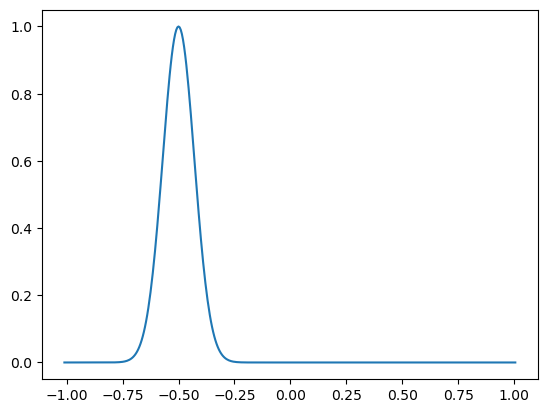

In [106]:
import xml
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max, nx = -1,1,400
dx = (x_max-x_min) / (nx)
x0 = -0.5
ng=2 
ng_count= 2*ng
N = nx + ng_count

# xx = np.zeros(N)
qL = np.zeros(N)
qR = np.zeros(N)
f_half = np.zeros(N) 

# x = xx.copy()

x =  np.arange(x_min-ng*dx,x_max+ng*dx,dx)
# x[1] = x[ng] - dx 
# x[0] = x[1] - dx
# x[nx+ng] = x[nx+ng-1] + dx 
# x[nx+ng+1] = x[nx+ng] + dx 


# print(x)
def riemann_function(qL,qR,v):
    fL = qL * v 
    fR = qR * v 
    return 0.5 * ((fL + fR)-abs(v)*(qR-qL))

def minmod(a,b):
    sign_a = np.sign(a) # -1 , 0 , 1 
    sign_b = np.sign(b) 
    return 0.5 * (sign_a +sign_b)*min(abs(a),abs(b))  # ab <= 0 -> s_i = 0 , ab>0, a>b => s_i = b , a < b => s_i = a 

def periodic_q(q,ng):
    q[:ng] = q[nx+ng-1]
    q[ng]

v = 1.0
Time_set = 1.0
lam= 0.5
sig = 0.1
dt = lam*(dx/v)
A = 1.0

q = A * np.exp(-(x-x0)**2/sig**2)
q0 = q.copy()

Time = 0
counts=0

print(q)

plt.plot(x,q)
# while(Time<=Time_set):

#     q[:ng] = q[nx:nx+ng]
#     q[nx+ng:] = q[ng:ng+ng]

#     for i in range(0,N-1):  # boundary의 중심 값 찾기 위해서
#         sL = (q[i]-q[i-1]) / (x[i]-x[i-1]) 
#         sR = (q[i+1]-q[i]) / (x[i+1]-x[i])
#         s_i = minmod(sL,sR)
#         print(sL,sR,s_i,q[0],q[1],q[-1])
#         stop
#         qL[i] = q[i] - s_i*(x[i]-x[i-1])*0.5
#         qR[i] = q[i] + s_i*(x[i+1]-x[i])*0.5

#     q_new = q.copy()

#     for i in range(ng,nx+ng-1):
#         f_half[i] = riemann_function(qR[i-1],qL[i],v)
        
#     for i in range(ng,nx+ng-1):
#         q_new[i] = q[i] - (dt/dx)*(f_half[i]-f_half[i-1])
        
#     q = q_new

#     Time += dt 
#     counts += 1

# q_exact = A * np.exp(-(x-x0-v*Time_set)**2/sig**2)

# # plt.plot(x,q,'ro',label='numerical')
# plt.plot(x,q0,label='Source')
# plt.plot(x,q_exact,label='Analytic solution')

# plt.xlim(x_min,x_max)
# plt.legend()

# L_1 = np.sum(abs(q_exact-q))
# print(L_1)

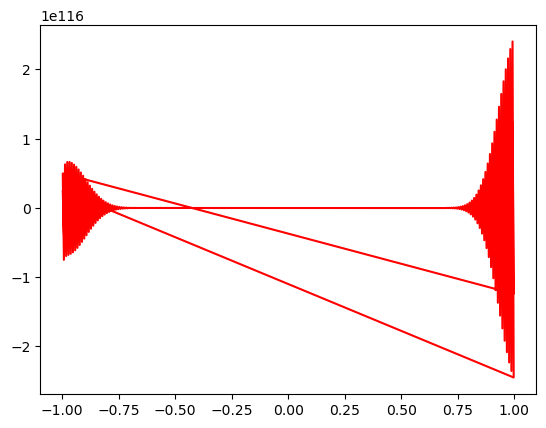

In [77]:
import numpy as np

x_min, x_max, nx = -1, 1, 400
dx = (x_max - x_min) / nx
x0 = -0.5
ng = 2
ngc = 2 * ng
N = nx + ngc

qL = np.zeros(N)
qR = np.zeros(N)
f_half = np.zeros(N)

# cell center (조금 더 FV스럽게)
x = np.zeros(N)
x[ng:ng+nx] = np.linspace(x_min + 0.5*dx, x_max - 0.5*dx, nx)

# ghost x 도 periodic하게 (또는 선형 연장)
x[:ng]       = x[nx:nx+ng]
x[nx+ng:]    = x[ng:ng+ng]

def riemann_function(qL, qR, v):
    fL = qL * v
    fR = qR * v
    return 0.5 * ((fL + fR) - abs(v) * (qR - qL))

def minmod(a, b):
    sign_a = np.sign(a)
    sign_b = np.sign(b)
    return 0.5 * (sign_a + sign_b) * min(abs(a), abs(b))

v = 1.0
Time_set = 1.0
lam = 0.5
sig = 0.1
dt = lam * (dx / v)

q = np.exp(-(x - x0)**2 / sig**2)

Time = 0.0

while Time <= Time_set:

    # periodic BC for q
    q[:ng]       = q[nx:nx+ng]
    q[nx+ng:]    = q[ng:ng+ng]

    # reconstruction (양 끝 한 칸은 피해서)
    for i in range(1, N-1):
        sL = (q[i] - q[i-1]) / (x[i] - x[i-1])
        sR = (q[i+1] - q[i]) / (x[i+1] - x[i])
        s_i = minmod(sL, sR)
        qL[i] = q[i] - 0.5 * s_i * (x[i] - x[i-1])
        qR[i] = q[i] + 0.5 * s_i * (x[i+1] - x[i])

    q_new = q.copy()

    # flux at interfaces i-1/2, index i
    for i in range(ng, nx+ng):
        f_half[i] = riemann_function(qR[i-1], qL[i], v)

    # update: F_{i+1/2} - F_{i-1/2}
    for i in range(ng, nx+ng):
        q_new[i] = q[i] - (dt/dx) * (f_half[i] - f_half[i-1])

    q = q_new
    Time += dt


plt.plot(x,q,'r-')



In [138]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max, nx = -1,1,400
dx = (x_max-x_min) / (nx)
x0 = -0.5
norder=2 
ng = 2*norder  

real_x = np.zeros(nx + ng)
real_x[2:nx-ng+1] = np.linspace(x_min,x_max,nx)
# x = np.linspace(x_min,x_max,nx)



# ghost grid -> 만들기  + periodic + outgoing 형식으로 만들기.

v = 1.0
T = 1.0
# dt = 0.001
lamb = 0.5 
dt = lamb * (dx / v)
nT = int(T/dt)
sigma = 0.1
A = 1.0

q = A * np.exp(- (x-x0)**2/sigma**2 )
q0 = q.copy()

def riemann_flux(qL,qR,v):
    fL = qL*v
    fR = qR*v 
    return 0.5* ((fL+fR) - abs(v)*(qR-qL))

def minmod(a, b):
    sign_a = np.sign(a)
    sign_b = np.sign(b)

    return 0.5 * (sign_a + sign_b) * min(abs(a), abs(b))


# 1. Riemann argument -> fhalf  q[i-1] ->qR = qL    q[i] -> qL  qR
# 2. Minmod -> limiter 2nd order (qL , qR index)

f_half = np.zeros(nx+1)
qL =  np.zeros(nx+1)
qR =  np.zeros(nx+1)

for n in range(nT):
    
    for i in range(0,nx-1):
        s_L = (q[i] - q[i-1])/(x[i]-x[i-1])
        s_R = (q[i+1] - q[i])/(x[i+1]-x[i])

        s_i = minmod(s_L,s_R)

        qL[i] = q[i] - s_i*(x[i]-x[i-1])*0.5 # dx/2
        qR[i] = q[i] + s_i*(x[i+1]-x[i])*0.5
        # s_i = min()



    for i in range(1,nx-1):
        f_half[i] = riemann_flux(qR[i-1],qL[i],v)

    q_new = q.copy()
    for i in range(1,nx-1):
        q_new[i] = q[i] - (dt/dx)*(f_half[i]-f_half[i-1])
    
    # q_new[0] = 0.0

    q = q_new

q_exact = A * np.exp(- (x-x0-v*T)**2/sigma**2 )
plt.plot(x,q0,'k-',alpha=0.5,label='Source')

plt.plot(x,q,'r--',alpha=0.5,label='Numerical solution')

plt.plot(x,q_exact,'b-',alpha=0.5,label='Intrinsic Solution')

# chi2 = np.sum((q_exact-q)**2)

L_1 = np.sum(abs(q_exact - q)) / nx

print(L_1)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')


ValueError: could not broadcast input array from shape (400,) into shape (395,)

In [ ]:
L1 = 0.002614048
L2 = 0.001326611

